#**Importing The Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import express as px

#**Reading and Understanding The Dataset**

#Loading the dataset into a dataframe and displaying the first 5 rows wuth the head() method

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Let's find out how many entries there are in our dataset, using `shape` function.

In [ ]:
df.shape

(891, 12)

##Using `info` function, we will take a look at our types of data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##According to the output above, we have 891 entries, 0 to 890, as well as 12 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 891 then there is no missing values for that particular feature.

##We also have a mix of numerical (5 int64 and 2 float64) and  5 object data types.

##Using `describe` function, we will take a look at the summary statistics.

In [ ]:
# Display summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##The above code shows the mean,median,min amd max values of the numerical columns

#checking  the percentage of mising values in each columns

In [ ]:
df.isnull().sum()/len(df)

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


#Drop rows with missing values in 'Cabin' (since it has many missing values and might not be very informative)


In [ ]:
df.dropna(subset=['Cabin'], inplace=True)

#checking for duplicate values

In [ ]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#**EXPLORATORY DATA ANALYSIS(EDA)**

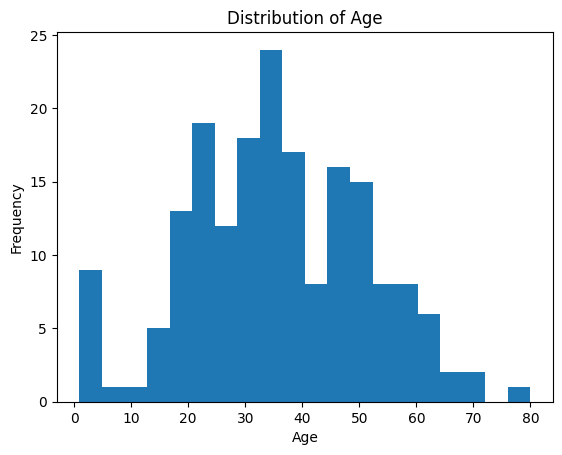

In [74]:
#checking the distrbution of the 'age' column
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#From the plot above it's shown that the Age  bracket with the highest frequency are (32-37)

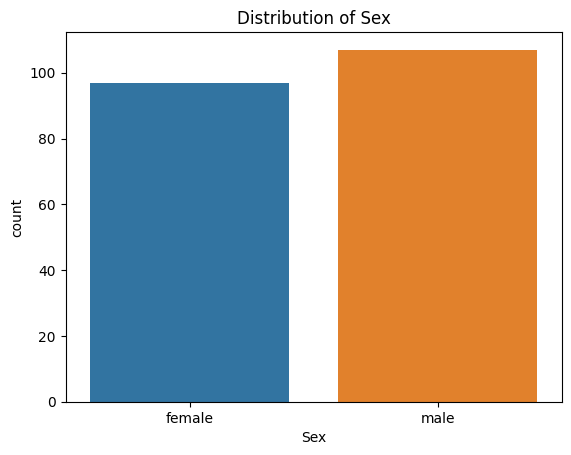

In [73]:
#checking the distrbution of the 'Sex' column
sns.countplot(x='Sex', hue='Sex',data=df)
plt.title('Distribution of Sex')
plt.show()

##From the above plot, there was 97 females and 107 males

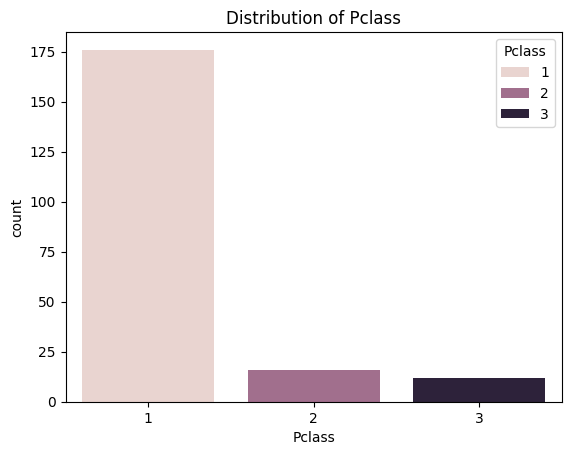

In [72]:
sns.countplot(x='Pclass',hue='Pclass', data=df)
plt.title('Distribution of Pclass')
plt.show()

#From the above plot it's shown that 176 people were on the firstclass while 16 on second class and 12 on third class

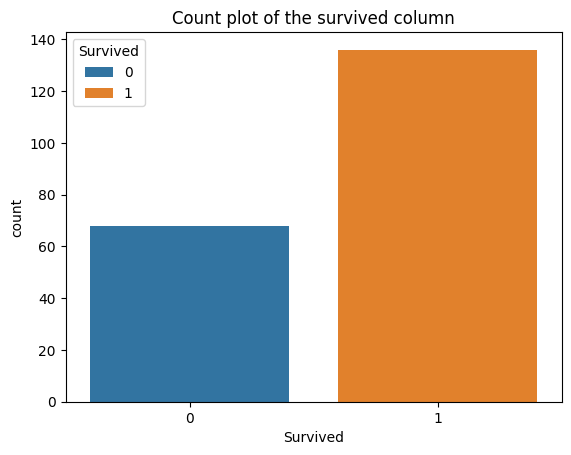

In [69]:
#checking the distrbution of the 'Survival' column
sns.countplot(x='Survived', hue='Survived', data=df)
plt.title('Count plot of the survived column')
plt.show()

Based on the plot above,it can be concluded that 136 people survived the sink while 68 didn't.

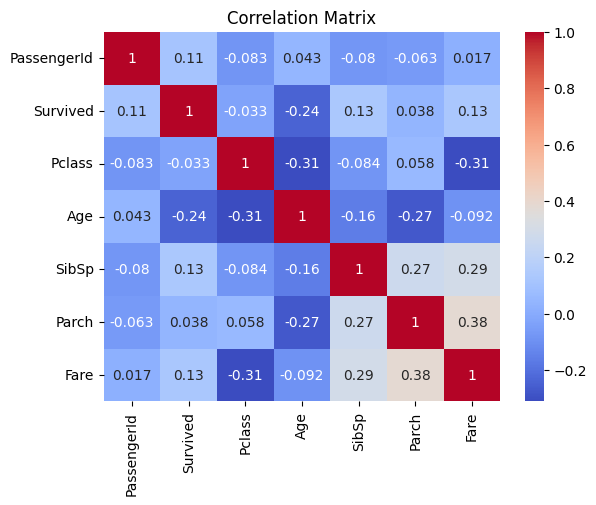

In [ ]:
# Correlation matrix
df_numeric = df.select_dtypes(exclude=['object'])
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

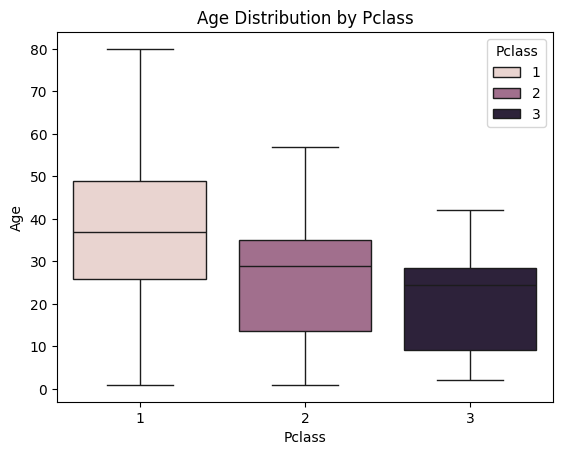

In [64]:
# Box plot of 'Age' by 'Pclass'
sns.boxplot(x='Pclass', y='Age', data=df,hue='Pclass')
plt.title('Age Distribution by Pclass')
plt.show()

#From the plot above
##1.The average age of people who bought the first class ticket was 37 with the max being 80
##2.The average age of people who bought the Second class ticket was 29 with the max being 57
##3.The average age of people who bought the Third class ticket was 24 with the max being 42

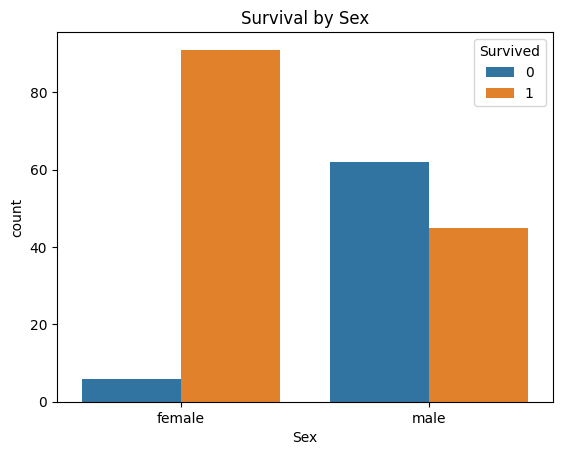

In [61]:
# Bar plot of 'Survived' by 'Sex'
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

#From the above plot
##1. 45 Male survived while 62 didn't
##2. 91 Female survived while 6 didn't

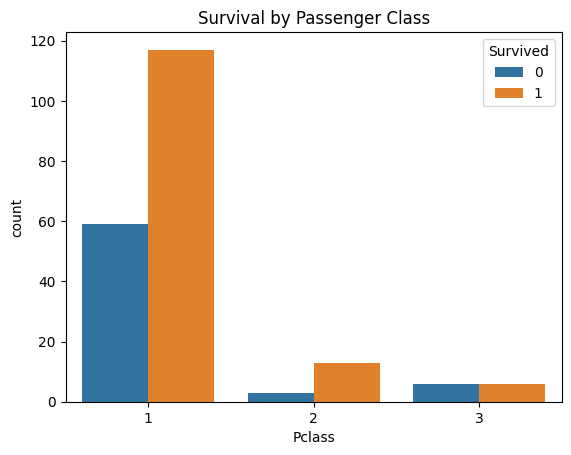

In [60]:
# count plot of 'Survived' by 'pclass'
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

#Based on the above plot
##1. 117 people with first class ticket survived while 59 didn't
##2. 13 people with second class ticket survived while 3 didn't
##3. 3 people with third class ticket survived while 6 didn't

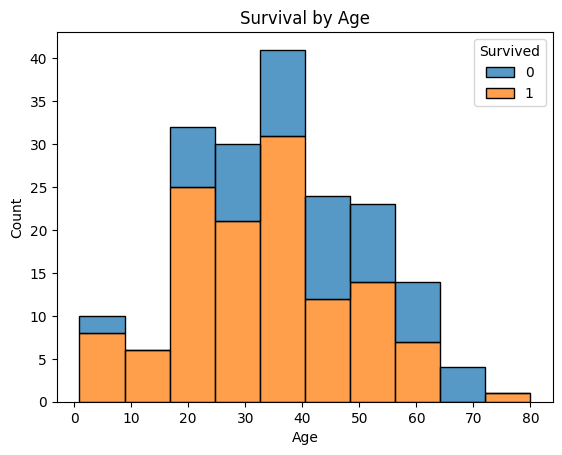

In [59]:
# Visualize survival rates by age
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack")
plt.title('Survival by Age')
plt.show()

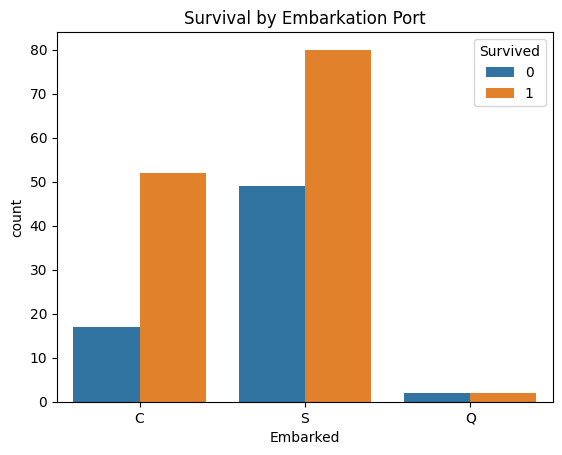

In [58]:
# Visualize survival rates by embarkation port
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()

#C = Cherbourg, Q = Queenstown, S = Southampton

#Based on the above plot
##1. 52 people who embarked at cherbourg survived while 17 didn't
##2. 80 people who embarked at Queenstown survived while 49 didn't
##3. 2 people who embarked at Southampton survived while 2 didn't

#**SUMMARY**

##The analysis reveals the impact of variables like passenger class, gender, age, fare, and embarkation point on survival rates.
##Key conclusions include:

#1.Higher survival rates for 1st-class passengers and women.
#2.Children also had a higher likelihood of survival.
#3.Passengers who paid higher fares or embarked from Cherbourg had better survival rates.

In [57]:
jupyter nbconvert --to html Titanic_dataset_EDAipynb.ipynb

SyntaxError: invalid syntax (<ipython-input-57-58bfa552ae17>, line 1)